## Quantium Virtual Internship - Retail strategy and Analytics - TASK 1

####  Q:Understanding the types of customers that purchase chips?
####  Q:Purchasing behaviour of customer segment?

In [2]:
#required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore') 

In [3]:
#plot settings
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) 
%matplotlib inline





## Data Preperation

In [4]:
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')
purchase_behaviour.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
transaction_data

Changing the date format for transaction_data 

In [6]:
#changing the date format here to it easier later 
date_offsets = transaction_data['DATE']
base_date = pd.Timestamp('1899-12-30')  
transaction_data['DATE'] = [
    base_date + pd.DateOffset(date_offset) 
    for date_offset in date_offsets
]


In [7]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Inspecting the Data

In [8]:
purchase_behaviour.info()
shape_pruchase = purchase_behaviour.shape
print('\n purchase_behaviour dataset has {} rows and {} columns'.format(shape_pruchase[0], shape_pruchase[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

 purchase_behaviour dataset has 72637 rows and 3 columns


In [9]:
transaction_data.info()
shape_transaction = transaction_data.shape

print('\n shape_transaction dataset has {} rows and {} columns'.format(shape_transaction[0], shape_transaction[1]))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB

 shape_transaction dataset has 264836 rows and 8 columns


In [10]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


## Exploratory Data Analysis

### Univariate Analysis - purchase_behaviour Dataset

In [11]:
#checking any duplicate rows
print('LYLTY_CARD_NBR has {} unique numbers, hence no duplicates'
      .format (purchase_behaviour.value_counts('LYLTY_CARD_NBR').sum()))

LYLTY_CARD_NBR has 72637 unique numbers, hence no duplicates


<AxesSubplot:>

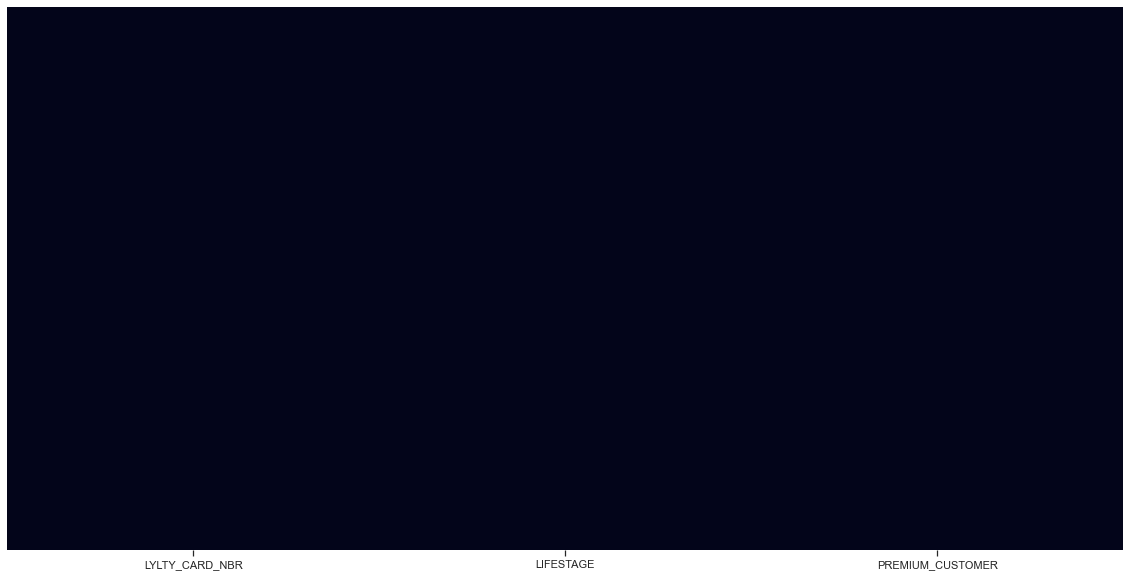

In [12]:
# checking missing values
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(purchase_behaviour.isnull(),yticklabels = False, ax=ax, cbar=False)

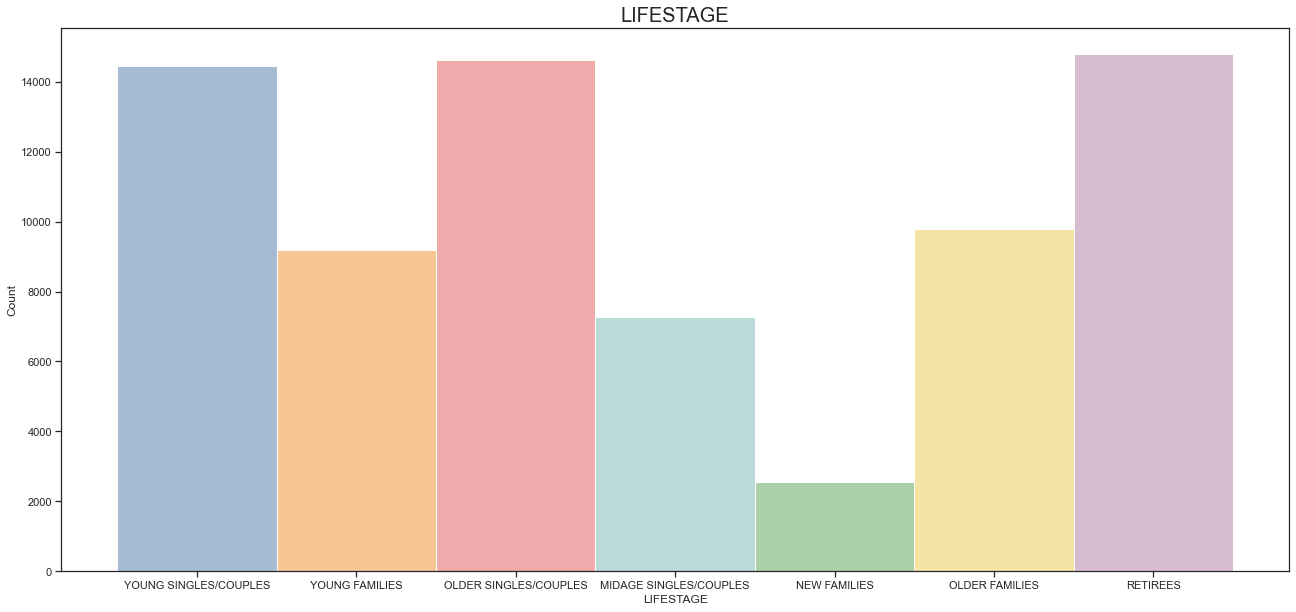

In [13]:
plt.rcParams['figure.figsize'] = (22,10)
sns.histplot(data=purchase_behaviour, x=purchase_behaviour['LIFESTAGE'], hue="LIFESTAGE",legend=False)
plt.title('LIFESTAGE',fontsize=20 )
plt.show()



In [14]:
purchase_behaviour['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

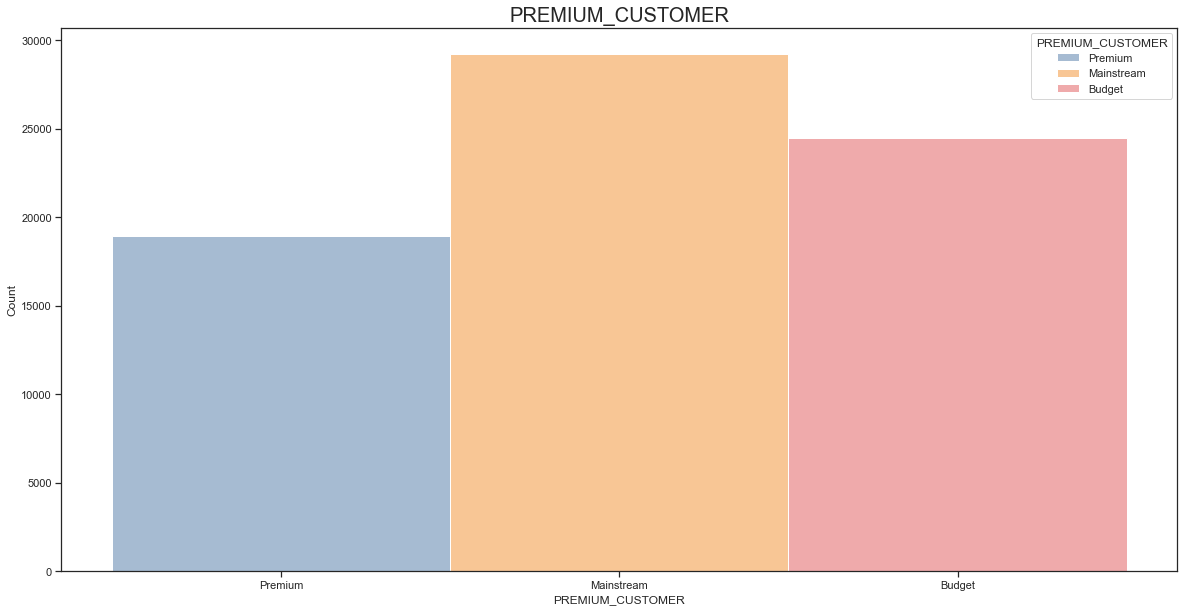

In [15]:
plt.rcParams['figure.figsize'] = (20,10)
sns.histplot(data=purchase_behaviour, x=purchase_behaviour['PREMIUM_CUSTOMER'], hue="PREMIUM_CUSTOMER")
plt.title('PREMIUM_CUSTOMER',fontsize=20 )
plt.show()


In [16]:
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

__Key takeaways from purchase_behavior dataset univariate analysis:__

- Retirees are the largest lifestage customer base. 

- There are a lot more singles/couples in their Lifestage than families.

- Mainstream customer makes the largest customer category, followed by budget and Premium 


### Univariate Analysis - transaction_data Dataset

In [17]:
#checking any duplicate rows
print('LYLTY_CARD_NBR has {} unique numbers, hence no duplicates'
      .format (transaction_data.value_counts('DATE').sum()))

LYLTY_CARD_NBR has 264836 unique numbers, hence no duplicates


In [18]:
transaction_data.value_counts('DATE').unique().sum()

86019

#### Removing Salsa Products

In [19]:
for i in transaction_data['PROD_NAME'].unique():
    print(i)
    
#Even though Red Rock Deli SR    Salsa & Mzzrlla 150g says Salsa it is not a salsa 
#Similarly, Smiths Crinkle Cut  French OnionDip 150g says salsa it is not a salsa 

#Conversely, seperating salsa by weight might be a better option 

Natural Chip        Compny SeaSalt175g
CCs Nacho Cheese    175g
Smiths Crinkle Cut  Chips Chicken 170g
Smiths Chip Thinly  S/Cream&Onion 175g
Kettle Tortilla ChpsHny&Jlpno Chili 150g
Old El Paso Salsa   Dip Tomato Mild 300g
Smiths Crinkle Chips Salt & Vinegar 330g
Grain Waves         Sweet Chilli 210g
Doritos Corn Chip Mexican Jalapeno 150g
Grain Waves Sour    Cream&Chives 210G
Kettle Sensations   Siracha Lime 150g
Twisties Cheese     270g
WW Crinkle Cut      Chicken 175g
Thins Chips Light&  Tangy 175g
CCs Original 175g
Burger Rings 220g
NCC Sour Cream &    Garden Chives 175g
Doritos Corn Chip Southern Chicken 150g
Cheezels Cheese Box 125g
Smiths Crinkle      Original 330g
Infzns Crn Crnchers Tangy Gcamole 110g
Kettle Sea Salt     And Vinegar 175g
Smiths Chip Thinly  Cut Original 175g
Kettle Original 175g
Red Rock Deli Thai  Chilli&Lime 150g
Pringles Sthrn FriedChicken 134g
Pringles Sweet&Spcy BBQ 134g
Red Rock Deli SR    Salsa & Mzzrlla 150g
Thins Chips         Originl saltd 175g
Red 

In [20]:
#changing Kettle 135g Swt Pot Sea Salt description to Kettle Swt Pot Sea Salt 135g
transaction_data.replace(['Kettle 135g Swt Pot Sea Salt'], 'Kettle Swt Pot Sea Salt 135g',inplace=True)

In [21]:
salsa = transaction_data['PROD_NAME'].str.contains(pat = 'S[a-z]a', regex = True)

print('There are {} rows with Salsa keyword in them, but as stated earlier they might contain some chips as well. All Salsas are 300g, it would be better to remove them based on weight'
      
      .format(salsa.sum()))

There are 23200 rows with Salsa keyword in them, but as stated earlier they might contain some chips as well. All Salsas are 300g, it would be better to remove them based on weight


#### Creating seperate weight and Brand 

In [22]:
#Splitting Weight from PROD_NAME and storing them in a seperate variable
transaction_data['WEIGHT'] = transaction_data['PROD_NAME'].str[-4:-1]
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [23]:
transaction_data['WEIGHT'].unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', '135', '250', '200', '160',
       '190', ' 90', ' 70'], dtype=object)

In [24]:
#Removing all salsas by weight
customer_transaction = transaction_data[transaction_data["WEIGHT"].str.contains("300")==False]

In [25]:
customer_transaction['WEIGHT'].unique()

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '135', '250', '200', '160', '190',
       ' 90', ' 70'], dtype=object)

In [26]:
#Splitting Brand names from PROD_NAME and storing them in a seperate variable
customer_transaction['BRAND'] = customer_transaction['PROD_NAME'].str.extract('([A-Z]\w{0,})', expand=True)
customer_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


### Cleaning Brand Names

In [27]:
customer_transaction['BRAND'].value_counts()
#different keyword for the same brand, eg: infuzions and Infzns

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [28]:
customer_transaction['BRAND'].replace('Red', 'RRD', inplace=True)
customer_transaction['BRAND'].replace('Smith', 'Smiths', inplace=True)
customer_transaction['BRAND'].replace('Infzns', 'Infuzions', inplace=True)
customer_transaction['BRAND'].replace('Snbts', 'Sunbites', inplace=True)
customer_transaction['BRAND'].replace('GrnWves', 'Grainwaves', inplace=True)
customer_transaction['BRAND'].replace('Grain', 'Grainwaves', inplace=True)
customer_transaction['BRAND'].replace('Natural', 'NCC', inplace=True)
customer_transaction['BRAND'].replace('WW', 'Woolworths', inplace=True)
customer_transaction['BRAND'].replace('Doritoes', 'Doritos', inplace=True)




In [29]:
customer_transaction['BRAND'].value_counts()

Kettle        41288
Smiths        31823
Pringles      25102
Doritos       22041
RRD           17779
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
Grainwaves     7740
NCC            7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Dorito         3185
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: BRAND, dtype: int64

### Dropping outliers 

In [30]:
customer_transaction.describe()
#outlier in PROD_QTY

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,249670.000000,2.496700e+05,2.496700e+05,249670.000000,249670.000000,249670.000000
mean,135.044278,1.355203e+05,1.351234e+05,56.294288,1.907762,7.293966
std,76.773591,8.065746e+04,7.813155e+04,33.528758,0.657126,3.071796
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001625e+04,6.757425e+04,27.000000,2.000000,5.700000
50%,130.000000,1.303600e+05,1.351475e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030798e+05,2.026338e+05,86.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [31]:
customer_transaction.loc[customer_transaction['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito


In [32]:
customer_transaction.loc[customer_transaction['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito


In [33]:
customer_transaction.drop([69762, 69763], inplace = True )

In [34]:
customer_transaction.describe() 

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,249668.000000,2.496680e+05,2.496680e+05,249668.000000,249668.000000,249668.000000
mean,135.043550,1.355196e+05,1.351227e+05,56.294707,1.906175,7.288817
std,76.773467,8.065737e+04,7.813144e+04,33.528566,0.342744,2.475279
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001600e+04,6.757375e+04,27.000000,2.000000,5.700000
50%,130.000000,1.303595e+05,1.351465e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030790e+05,2.026322e+05,86.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


### Finding Missing Date

In [35]:
groupby_date = customer_transaction.groupby('DATE').sum()
print(groupby_date)






            STORE_NBR  LYLTY_CARD_NBR    TXN_ID  PROD_NBR  PROD_QTY  TOT_SALES
DATE                                                                          
2018-07-01      90280        90389636  90234109     38769      1289     4962.9
2018-07-02      87130        87234845  87111526     37168      1274     4938.1
2018-07-03      94490        94603086  94643683     39385      1315     5005.7
2018-07-04      93505        93616386  93525068     38172      1306     5020.9
2018-07-05      89818        89922491  89888989     39337      1264     4698.2
...               ...             ...       ...       ...       ...        ...
2019-06-26      90276        91800865  90104449     37302      1277     4898.3
2019-06-27      87757        87871278  87769362     37605      1286     4967.9
2019-06-28      95271        96087160  95320362     39070      1312     4940.4
2019-06-29      94783        97797369  94715557     38048      1364     5201.2
2019-06-30      95933        96045214  95913814     

In [36]:
#missing date
missing_date = pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(groupby_date.index)
print('Due to the public holiday on Christmas Day, there are no transactions on {}'
      .format(missing_date[0]))

Due to the public holiday on Christmas Day, there are no transactions on 2018-12-25 00:00:00


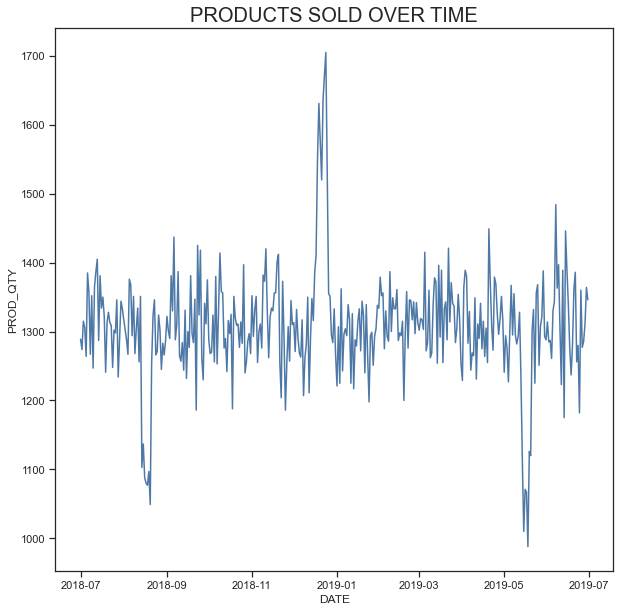

In [37]:
plt.rcParams['figure.figsize'] = (10,10)
Products_sold = groupby_date['PROD_QTY']

sns.lineplot(data = Products_sold)
plt.title('PRODUCTS SOLD OVER TIME',fontsize=20 )
plt.show()


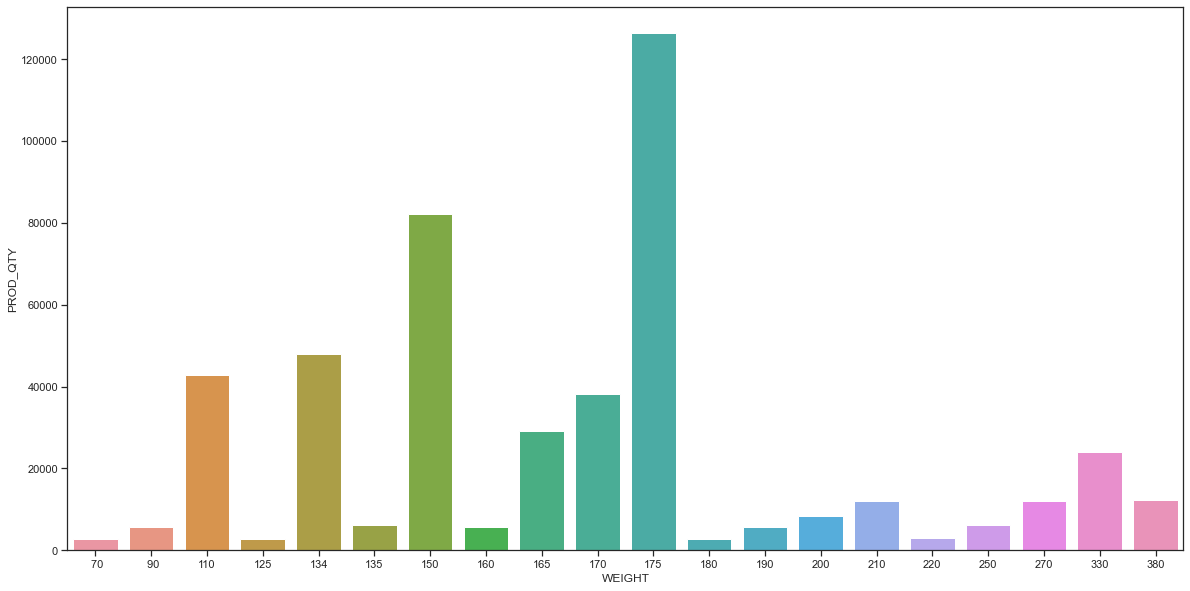

In [38]:
#Pack Size
groupby_weight = customer_transaction.groupby('WEIGHT',as_index = False).sum()
#print(groupby_weight)
plt.rcParams['figure.figsize'] = (20,10)
sns.barplot(data = groupby_weight, x = groupby_weight['WEIGHT'], y=groupby_weight['PROD_QTY'])
plt.show()

### Merging two cleaned Dataset 

In [39]:
data = pd.merge(customer_transaction, purchase_behaviour,on=['LYLTY_CARD_NBR','LYLTY_CARD_NBR'])
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [40]:
data.to_excel('/Users/ankurbedi/Documents/df.xlsx', index = False)

<AxesSubplot:>

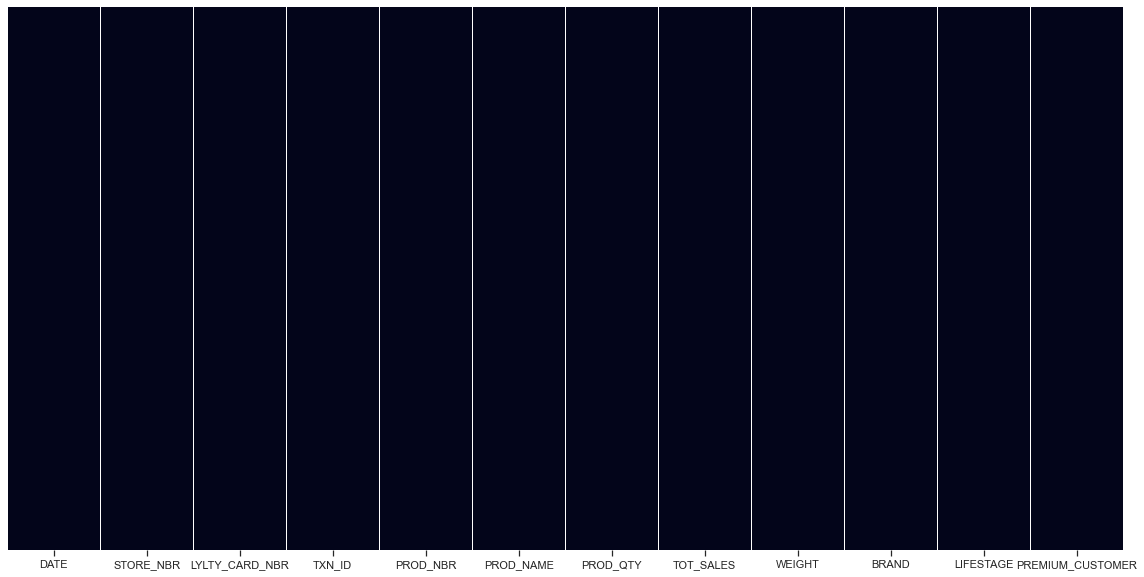

In [41]:
#No null values
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data.isnull(),yticklabels = False, ax=ax, cbar=False)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249668 entries, 0 to 249667
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              249668 non-null  datetime64[ns]
 1   STORE_NBR         249668 non-null  int64         
 2   LYLTY_CARD_NBR    249668 non-null  int64         
 3   TXN_ID            249668 non-null  int64         
 4   PROD_NBR          249668 non-null  int64         
 5   PROD_NAME         249668 non-null  object        
 6   PROD_QTY          249668 non-null  int64         
 7   TOT_SALES         249668 non-null  float64       
 8   WEIGHT            249668 non-null  object        
 9   BRAND             249668 non-null  object        
 10  LIFESTAGE         249668 non-null  object        
 11  PREMIUM_CUSTOMER  249668 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.8+ MB


## Data Analysis on Customer Segment 

### Q: Who spends the most on chips?

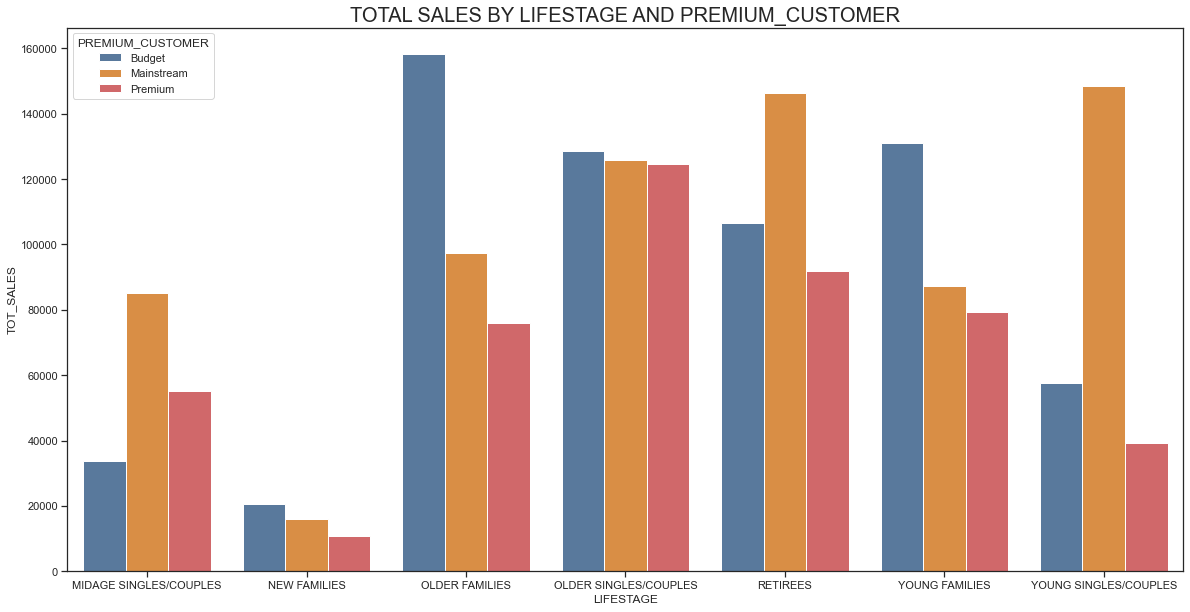

In [43]:
x = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index = False).sum()
sns.barplot(x = x['LIFESTAGE'], y = x['TOT_SALES'], hue = x['PREMIUM_CUSTOMER'])
plt.title('TOTAL SALES BY LIFESTAGE AND PREMIUM_CUSTOMER',fontsize=20 )
plt.show()

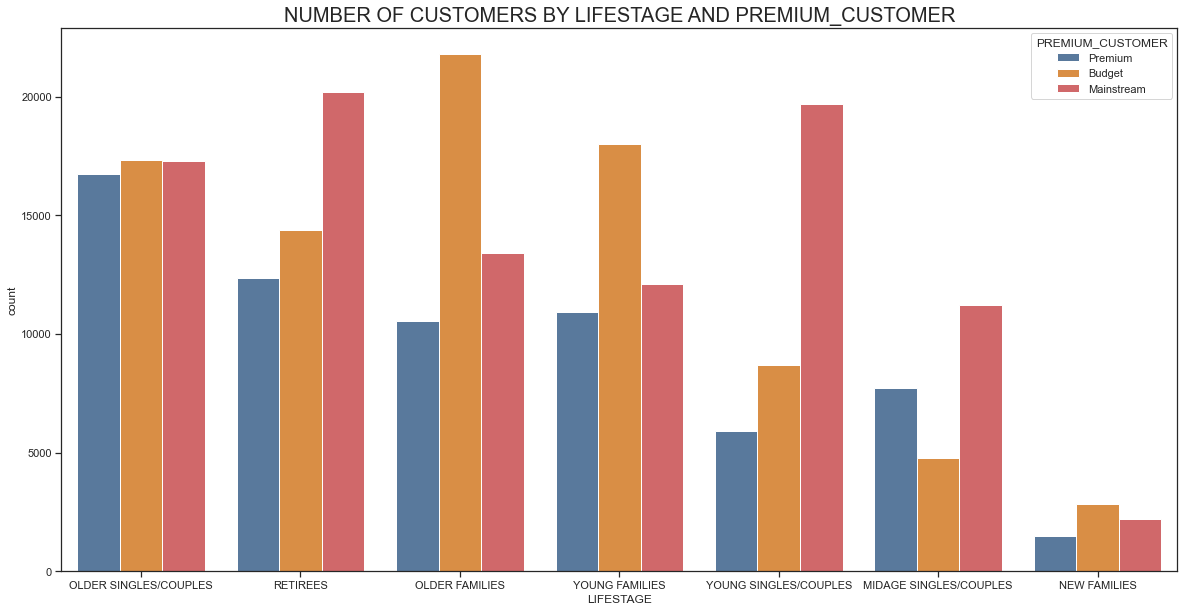

In [44]:
sns.countplot(data=data, x='LIFESTAGE', hue = 'PREMIUM_CUSTOMER', order=data['LIFESTAGE'].value_counts().index)
plt.title('NUMBER OF CUSTOMERS BY LIFESTAGE AND PREMIUM_CUSTOMER',fontsize=20 )
plt.show()


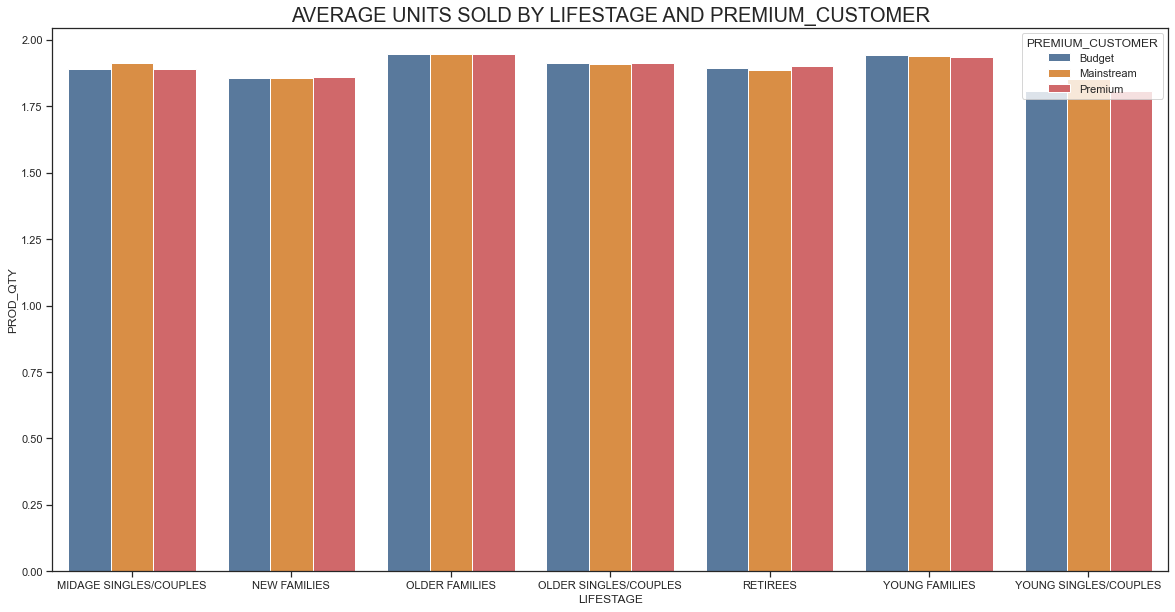

In [45]:
x = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index = False).mean()
sns.barplot(x = x['LIFESTAGE'], y = x['PROD_QTY'], hue = x['PREMIUM_CUSTOMER'])
plt.title('AVERAGE UNITS SOLD BY LIFESTAGE AND PREMIUM_CUSTOMER',fontsize=20 )
plt.show()

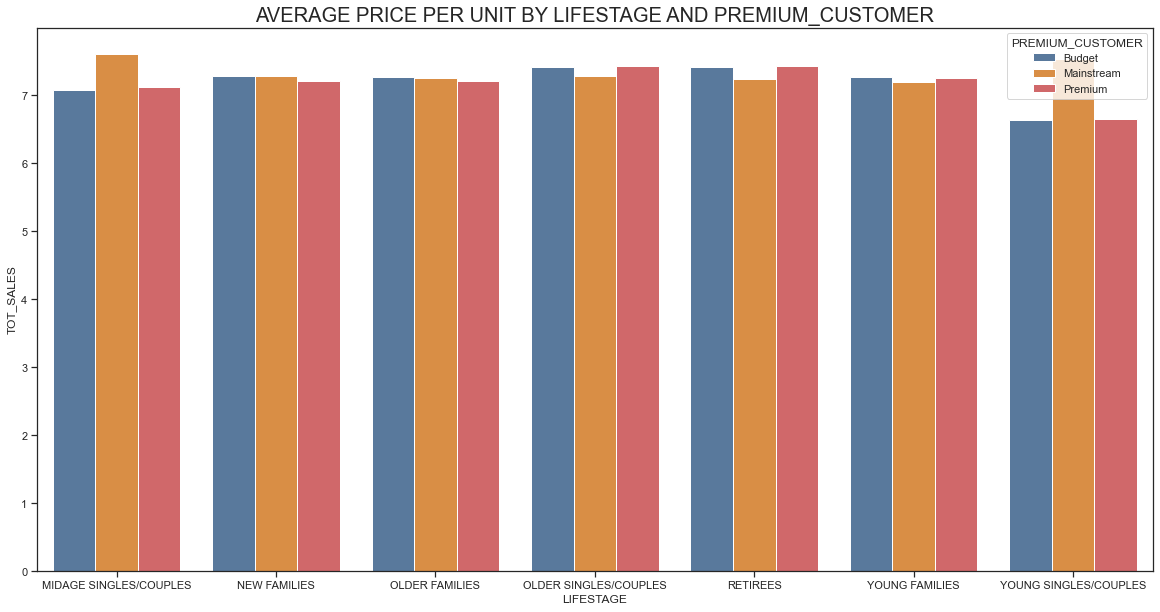

In [46]:
x = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index = False).mean()
sns.barplot(x = x['LIFESTAGE'], y = x['TOT_SALES'], hue = x['PREMIUM_CUSTOMER'])
plt.title('AVERAGE PRICE PER UNIT BY LIFESTAGE AND PREMIUM_CUSTOMER',fontsize=20 )
plt.show()

### Independent t-test between mainstream vs premium and budget midage and young singles and couples

In [47]:
price_mainstream = data.loc[(data['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER']=='Mainstream')|
                            (data['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')& (data['PREMIUM_CUSTOMER']=='Mainstream'),
                            ['TOT_SALES']]
price_premium_budget = data.loc[(data['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER']=='Premium')|(data['PREMIUM_CUSTOMER']=='Budget')|
                            (data['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')& (data['PREMIUM_CUSTOMER']=='Premium')|(data['PREMIUM_CUSTOMER']=='Budget'),
                            ['TOT_SALES']]

In [48]:
from scipy import stats
stats.ttest_ind(price_mainstream,price_premium_budget)

Ttest_indResult(statistic=array([21.87059469]), pvalue=array([7.63264716e-106]))

The t-test result generated a p-value of [7.63264716e-106], meaning the unit price for mainstream, young anf mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

### Mainstream Young/Singles customer segment Analysis

In [86]:
mainstream_young_singles = data.loc[(data['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & 
                                    (data['PREMIUM_CUSTOMER']=='Mainstream'),
                                    ('BRAND', 'PROD_QTY', 'LIFESTAGE', 'WEIGHT')]
mainstream_young_singles_brand = mainstream_young_singles.groupby('BRAND',as_index = False).sum().sort_values(['PROD_QTY'])

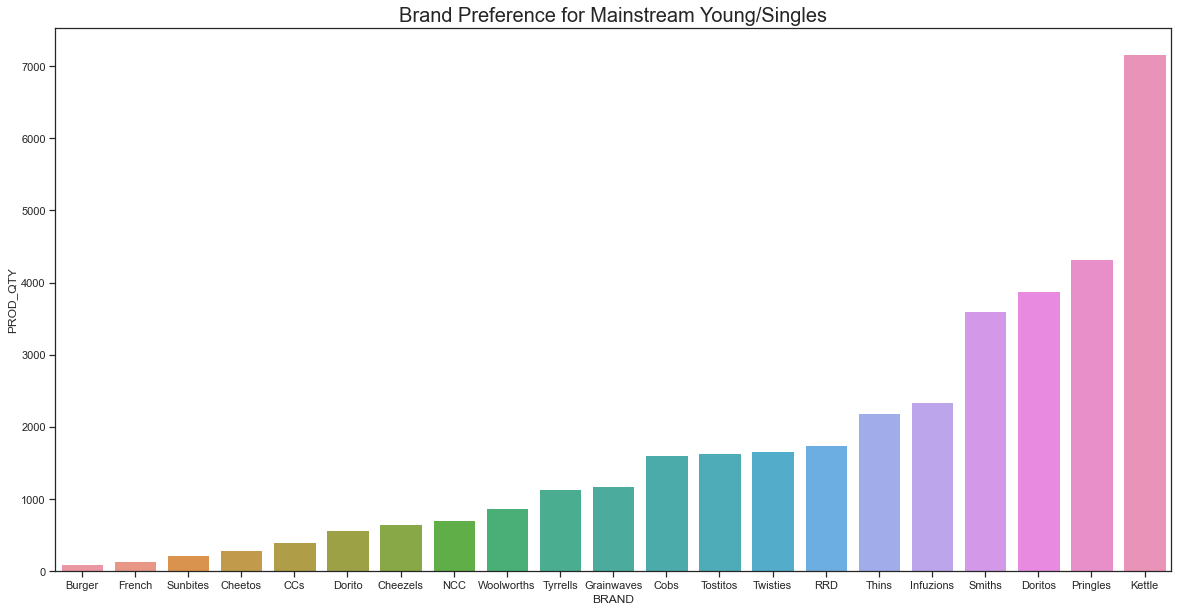

In [87]:
sns.barplot(x = mainstream_young_singles_brand['BRAND'], y = mainstream_young_singles_brand['PROD_QTY'])
plt.title('Brand Preference for Mainstream Young/Singles',fontsize=20 )
plt.show()

In [88]:
mainstream_young_singles_size = mainstream_young_singles.groupby('WEIGHT',as_index = False).sum().sort_values(['PROD_QTY'])

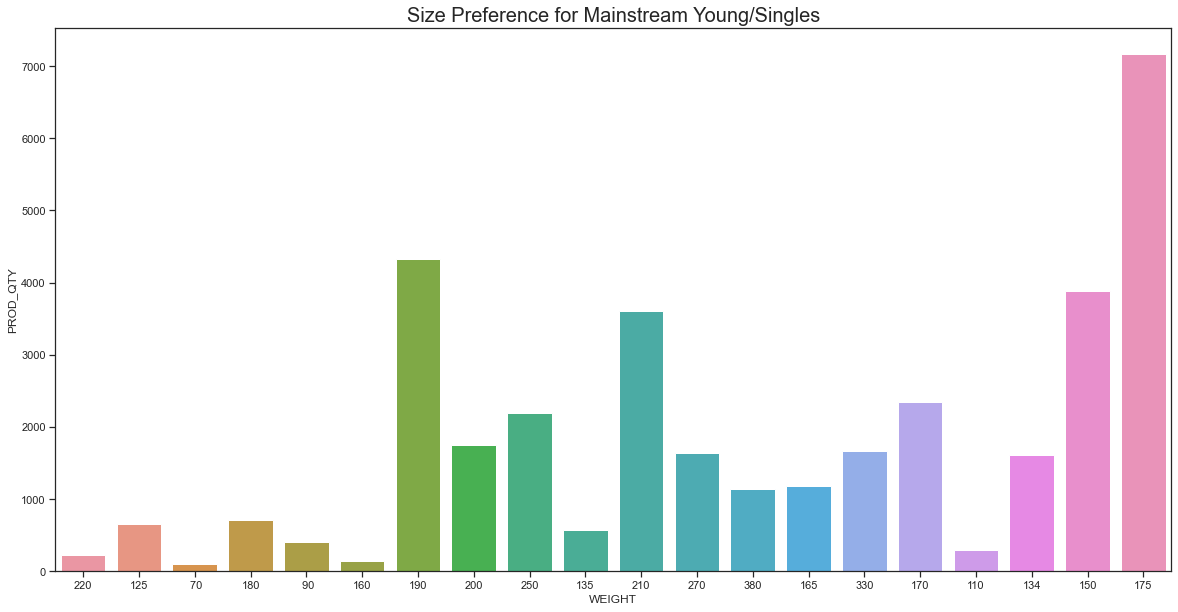

In [89]:
sns.barplot(x = am['WEIGHT'], y = a['PROD_QTY'])
plt.title('Size Preference for Mainstream Young/Singles',fontsize=20 )
plt.show()